Delta: 10.0
Value Function:
 [[ 0.  0.  0. 10.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 1.  0.  0.  5.]]
Delta: 9.0
Value Function:
 [[ 0.   0.   9.  19. ]
 [-0.9 -1.   0.   9. ]
 [ 0.9  0.   0.   0. ]
 [ 1.9  0.   0.   9.5]]
Delta: 8.100000000000001
Value Function:
 [[-0.81  0.   17.1  27.1 ]
 [-0.9  -1.    0.   17.1 ]
 [ 1.71  0.    0.    8.1 ]
 [ 2.71  0.    0.   13.55]]
Delta: 7.290000000000003
Value Function:
 [[-0.81  -0.729 24.39  34.39 ]
 [-0.9   -1.     0.    24.39 ]
 [ 2.439  0.     0.    15.39 ]
 [ 3.439  0.     0.    17.195]]
Delta: 6.561
Value Function:
 [[-0.81   -0.729  30.951  40.951 ]
 [-0.9    -1.      0.     30.951 ]
 [ 3.0951  0.      0.     21.951 ]
 [ 4.0951  0.      0.     20.4755]]
Delta: 5.904900000000001
Value Function:
 [[-0.81    -0.729   36.8559  46.8559 ]
 [-0.9     -1.       0.      36.8559 ]
 [ 3.68559  0.       0.      27.8559 ]
 [ 4.68559  0.       0.      23.42795]]
Delta: 5.314410000000002
Value Function:
 [[-0.81     -0.729    42.17031  52.17031 ]


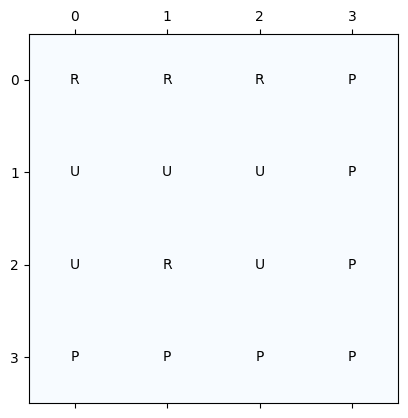

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import math

# Define the grid size
grid_size = 4

# Define the rewards and their positions
rewards = {
    (0, 0): 0,
    (0, 1): 0,
    (0, 2): 0,
    (0, 3): 10,
    (1, 0): 0,
    (1, 1): -1,
    (1, 2): 0,
    (1, 3): 0,
    (2, 0): 0,
    (2, 1): 0,
    (2, 2): 0,
    (2, 3): 0,
    (3, 0): 1,
    (3, 1): 0,
    (3, 2): 0,
    (3, 3): 5
}

# Define possible actions
actions = ['up', 'down', 'left', 'right']
action_vectors = {
    'up': (-1, 0),
    'down': (1, 0),
    'left': (0, -1),
    'right': (0, 1)
}

# Define transition dynamics (deterministic)
def get_next_state(state, action):
    x, y = state
    dx, dy = action_vectors[action]
    next_state = (x + dx, y + dy)
    if next_state in rewards:
        return next_state
    else:
        return state  # if next state is out the grid, stay in current state
    

# Initialize the value function and policy
V = np.zeros((grid_size, grid_size))
policy = np.random.choice(actions, (grid_size, grid_size))

# Parameters
gamma = 0.9  # Discount factor
theta = 1e-4  # Convergence threshold

# Policy Evaluation
def policy_evaluation(policy, V, gamma, theta):
    while True:
        delta = 0
        new_V = np.copy(V)
        for x in range(grid_size):
            for y in range(grid_size):
                state = (x, y)
                action = policy[state]
                next_state = get_next_state(state, action)
                reward = rewards[state]
                new_value = reward + gamma * V[next_state]
                delta = max(delta, abs(new_value - V[state]))
                new_V[state] = new_value
        V = new_V
        print("Delta:", delta)
        print("Value Function:\n", V)
        if delta < theta:
            break
    return V

# Policy Improvement
def policy_improvement(V, gamma):
    policy_stable = True
    for x in range(grid_size):
        for y in range(grid_size):
            state = (x, y)
            old_action = policy[state]
            action_values = {}
            for action in actions:
                next_state = get_next_state(state, action)
                reward = rewards[state]
                action_values[action] = reward + gamma * V[next_state]
            new_action = max(action_values, key=action_values.get)
            policy[state] = new_action
            if new_action != old_action:
                policy_stable = False
    return policy, policy_stable

# Policy Iteration
def policy_iteration(policy, V, gamma, theta):
    while True:
        V = policy_evaluation(policy, V, gamma, theta)
        policy, policy_stable = policy_improvement(V, gamma)
        print("Policy:\n", policy)
        if policy_stable:
            break
    return policy, V

# Compute the optimal policy and value function
optimal_policy, optimal_value_function = policy_iteration(policy, V, gamma, theta)

def print_policy(policy):
    policy_str = np.empty((grid_size, grid_size), dtype='<U5')
    for x in range(grid_size):
        for y in range(grid_size):
            policy_str[x, y] = policy[(x, y)]
    print(policy_str)

print("Optimal Policy:")
print_policy(optimal_policy)


# Test the implementation by running the agent in the grid world with reassignment logic
def run_agent(start_state, policy):
    state = start_state
    path = [state]
    step_count = 0

    while True:
        action = policy[state]
        next_state = get_next_state(state, action)
        path.append(next_state)
        state = next_state
        step_count += 1

        if rewards[state] == 10:
            break

    return path

# Example starting state
start_state = (3, 0)
path = run_agent(start_state, optimal_policy)

# Visualize the optimal policy and the path taken by the agent
def visualize_policy_and_path(policy, path):
    policy_grid = np.zeros((grid_size, grid_size), dtype=str)
    for x in range(grid_size):
        for y in range(grid_size):
            policy_grid[x, y] = policy[(x, y)][0].upper()

    for (x, y) in path:
        policy_grid[x, y] = 'P'
    
    print(policy_grid)

    fig, ax = plt.subplots()
    ax.matshow(np.zeros((grid_size, grid_size)), cmap=plt.cm.Blues)

    for (x, y), value in np.ndenumerate(policy_grid):
        ax.text(y, x, value, va='center', ha='center')

    plt.show()

print("Path taken by the agent:")
print(path)
visualize_policy_and_path(optimal_policy, path)
